# **Hands-on Lab: Build an Interactive Dashboard with Plotly Dash**

In this lab, you will be building a Plotly Dash application for users to perform interactive visual analytics on SpaceX launch data in
real-time.


This dashboard application contains input components such as a dropdown list and a range slider to
interact with a pie chart and a scatter point chart. You will be guided to build this dashboard application via the following tasks:

* TASK 1: Add a Launch Site Drop-down Input Component
* TASK 2: Add a callback function to render `success-pie-chart` based on elected site dropdown
* TASK 3: Add a Range Slider to Select Payload
* TASK 4: Add a callback function to render the `success-payload-scatter-chart` scatter plot

**Note: Please take screenshots of the Dashboard and save them. Further upload your notebook to github.**

1. Copy and paste the below command to the terminal.

In [ ]:
python3.11 -m pip install pandas dash

2. Download a skeleton dashboard application and dataset

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"

In [ ]:
wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/t4-Vy4iOU19i8y6E3Px_ww/spacex-dash-app.py"

In [ ]:
python3.11 spacex-dash-app.py

* TASK 1: Add a Launch Site Drop-down Input Component
* TASK 2: Add a callback function to render `success-pie-chart` based on selected site dropdown
* TASK 3: Add a Range Slider to Select Payload
* TASK 4: Add a callback function to render the `success-payload-scatter-chart` scatter plot

### **Below I share the code used for create the plotly dash**

In [ ]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# 2. Load dataset
spacex_df = pd.read_csv('spacex_launch_dash.csv')

# 3. star aplication
app = dash.Dash(__name__)

# 4. Define min and max of payload mass
min_payload = spacex_df['Payload Mass (kg)'].min()
max_payload = spacex_df['Payload Mass (kg)'].max()

# 5. Layout
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),

    # Dropdown for select launch site
    dcc.Dropdown(
        id='site-dropdown',
        options=[
            {'label': 'All Sites', 'value': 'ALL'},
            {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
            {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
            {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
            {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
        ],
        value='ALL',
        placeholder='Select a Launch Site here',
        searchable=True
    ),

    html.Br(),

    # Pie Chart
    dcc.Graph(id='success-pie-chart'),

    html.Br(),

    html.P("Payload range (Kg):"),

    # Slider of Payload
    dcc.RangeSlider(
        id='payload-slider',
        min=0,
        max=10000,
        step=1000,
        marks={0: '0', 2500: '2500', 5000: '5000', 7500: '7500', 10000: '10000'},
        value=[min_payload, max_payload]
    ),

    # Scatter Chart
    dcc.Graph(id='success-payload-scatter-chart'),
])

# 6. Callback for pie chart
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(
            filtered_df,
            values='class',
            names='Launch Site',
            title='Total Success Launches By Site'
        )
        return fig
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(
            filtered_df,
            names='class',
            title=f'Total Success Launches for site {entered_site}'
        )
        return fig

# 7. Callback for scatter chart
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [
        Input(component_id='site-dropdown', component_property='value'),
        Input(component_id='payload-slider', component_property='value')
    ]
)
def update_scatter_chart(selected_site, payload_range):
    filtered_df = spacex_df[
        (spacex_df['Payload Mass (kg)'] >= payload_range[0]) &
        (spacex_df['Payload Mass (kg)'] <= payload_range[1])
    ]

    if selected_site == 'ALL':
        fig = px.scatter(
            filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title='Correlation between Payload and Success for all Sites'
        )
    else:
        filtered_df = filtered_df[filtered_df['Launch Site'] == selected_site]
        fig = px.scatter(
            filtered_df,
            x='Payload Mass (kg)',
            y='class',
            color='Booster Version Category',
            title=f'Correlation between Payload and Success for site {selected_site}'
        )

    return fig



# 8. run the server
if __name__ == '__main__':
    app.run(debug=True, port=8050)


**Results:**

1. Pie chart

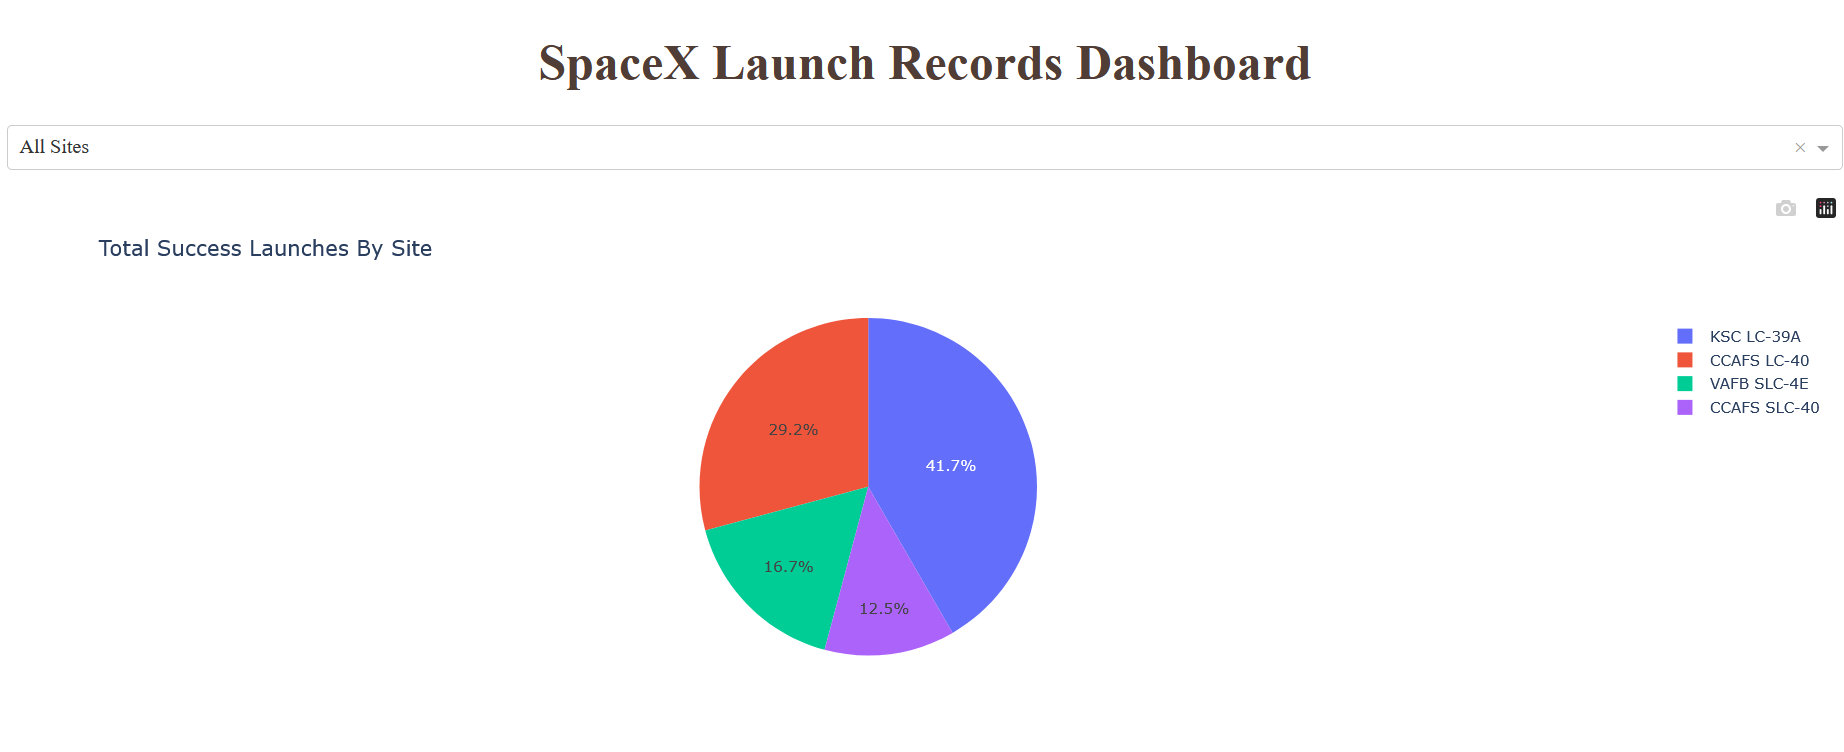

2. Payload range and Scatter plot

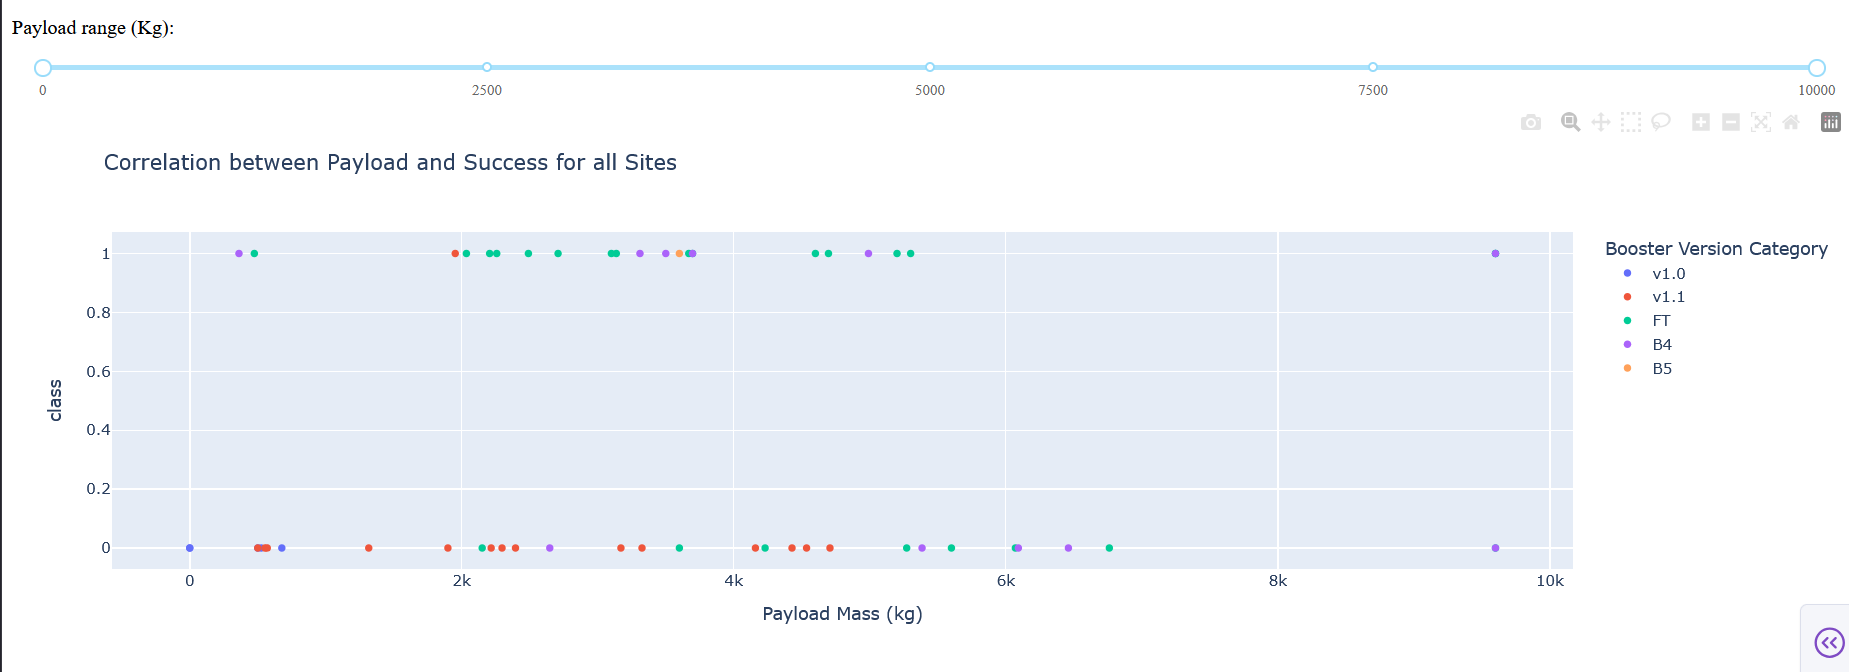

### Finding Insights Visually

Now with the dashboard completed, you should be able to use it to analyze SpaceX launch data, and answer the following questions:

* Which site has the largest successful launches?
* Which site has the highest launch success rate?
* Which payload range(s) has the highest launch success rate?
* Which payload range(s) has the lowest launch success rate?
* Which F9 Booster version (`v1.0`, `v1.1`, `FT`, `B4`, `B5`, etc.) has the highest
* launch success rate?

### **Plotly Dash Reference**
* Dropdown (input) component
* Range slider (input) component
* Pie chart (output) component
* Scatter chart (output) component

### **Author**
Yan Luo

### **Other contributor(s)**
Joseph Santarcangelo

**Note:** This document have the purpose of share the work developed by my person on **Lab: Build an Interactive Dashboard with Plotly Dash**. This contribute on my peer degree assignment in my Professional Certification.